# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [32]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [2]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [3]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

#Visualising and Performing Prediction on Single image

In [4]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.1/39.5 MB 11.7 MB/s eta 0:00:04
   -- ------------------------------------- 2.4/39.5 MB 7.9 MB/s eta 0:00:05
   -- ------------------------------------- 2.9/39.5 MB 4.8 MB/s eta 0:00:08
   --- ------------------------------------ 3.1/39.5 MB 4.2 MB/s eta 0:00:09
   --- ------------------------------------ 3.7/39.5 MB 3.5 MB/s eta 0:00:11
   --- ------------------------------------ 3.7/39.5 MB 3.5 MB/s eta 0:00:11
   --- ------------------------------------ 3.9/39.5 MB 2.6 MB/s eta 0:00:14
   ---- ----------------------------------- 4.5/39.5 MB 2.5 MB/s eta 0:00:14
   ---- ----------------------------------- 4.7/39.5 MB 2.5 MB/s eta 0:00:15
   ----- ---------------------------------- 5.2/39.5 MB 2.4 MB/s eta 0:00:15
   ----- ---------------------------------- 5.5/39.5 MB 2.3 MB/s eta 0:00:15
   ------ --------------------------------- 6.0/39.5 MB 2.3 MB/s eta 0:00:15
   --

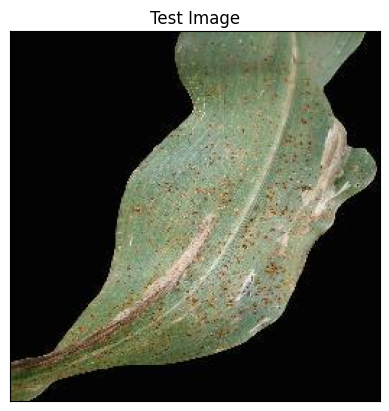

In [24]:
#Test Image Visualization
import cv2
image_path = 'test/test/CornCommonRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [10]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)
print(input_arr.shape)
predictions, predictions.shape

1/1 [==============================] - 0s 39ms/step
(1, 128, 128, 3)


(array([[4.3424014e-11, 2.6118320e-12, 9.9999976e-01, 7.3718551e-14,
         4.4687676e-10, 1.8608396e-13, 7.7498896e-17, 7.2367320e-11,
         1.7670861e-15, 7.4626844e-13, 2.1078399e-20, 1.0515283e-12,
         2.7387142e-14, 3.4669867e-15, 1.8620894e-13, 1.5515771e-11,
         9.9272375e-11, 6.0825497e-14, 5.9292828e-11, 1.2477774e-13,
         9.2759486e-14, 2.9437325e-13, 4.2733544e-13, 5.1998431e-14,
         1.8017049e-15, 1.7130779e-15, 2.6875438e-12, 9.1166097e-15,
         2.3821988e-07, 1.6632466e-08, 2.3754652e-09, 2.9331846e-13,
         4.2452055e-09, 1.1864152e-15, 4.2638736e-11, 4.9650273e-11,
         3.8302850e-11, 2.0150210e-12]], dtype=float32),
 (1, 38))

In [11]:
print(predictions)

[[4.3424014e-11 2.6118320e-12 9.9999976e-01 7.3718551e-14 4.4687676e-10
  1.8608396e-13 7.7498896e-17 7.2367320e-11 1.7670861e-15 7.4626844e-13
  2.1078399e-20 1.0515283e-12 2.7387142e-14 3.4669867e-15 1.8620894e-13
  1.5515771e-11 9.9272375e-11 6.0825497e-14 5.9292828e-11 1.2477774e-13
  9.2759486e-14 2.9437325e-13 4.2733544e-13 5.1998431e-14 1.8017049e-15
  1.7130779e-15 2.6875438e-12 9.1166097e-15 2.3821988e-07 1.6632466e-08
  2.3754652e-09 2.9331846e-13 4.2452055e-09 1.1864152e-15 4.2638736e-11
  4.9650273e-11 3.8302850e-11 2.0150210e-12]]


In [12]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


In [20]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
'Squash___Powdery_mildew',
'Strawberry___Leaf_scorch',
'Strawberry___healthy',
'Tomato___Bacterial_spot',
'Tomato___Early_blight',
'Tomato___Late_blight',
'Tomato___Leaf_Mold',
'Tomato___Septoria_leaf_spot', 
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']


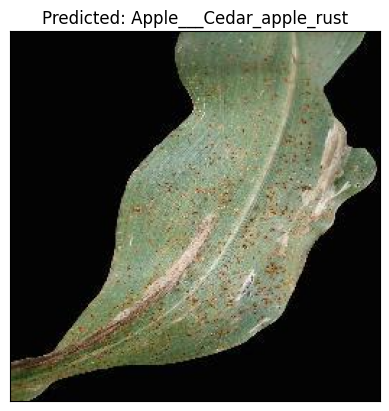

In [25]:
model_predictions = class_name[result_index]
plt.imshow(img)
plt.title(f'Predicted: {model_predictions}')
plt.xticks([])
plt.yticks([])
plt.show()